Link to intoduction to cv and image processing note : https://docs.google.com/presentation/d/1wi2EA8lpV7MNSjyZzD_VkGjCzVbmlsngnU-EUmrbqG4/edit?usp=sharing

# 📷 What is a Digital Image?

### 🔹 Pixels
- A **pixel** (short for "picture element") is the smallest unit of a digital image.
- Each pixel contains information about color or intensity.
- In **grayscale images**, a pixel holds a single intensity value (0–255), where:
  - `0 = black`, `255 = white`
- In **color images**, a pixel is typically a triplet representing color channels (e.g., R, G, B).

### 🔹 Channels
- A **channel** is one layer of color information.
- Common channel configurations:
  - **Grayscale**: 1 channel (intensity only)
  - **RGB**: 3 channels (Red, Green, Blue)
  - **RGBA**: 4 channels (adds Alpha for transparency)

### 🔸 Code Example



In [56]:
from PIL import Image
img = Image.open('dog.png')
print("Mode:", img.mode)
print("Format:", img.format)


Mode: RGB
Format: AVIF


In [6]:
# Convert AVIF to PNG properly
from PIL import Image

img = Image.open('dog.png')  # actually AVIF
img.save('dog_real.png', format='PNG')  # convert properly to PNG


In [9]:
import cv2

# Read and display image
img = cv2.imread('dog_real.png')
cv2.imshow('Original', img)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale', gray)

cv2.waitKey(0)
cv2.destroyAllWindows()


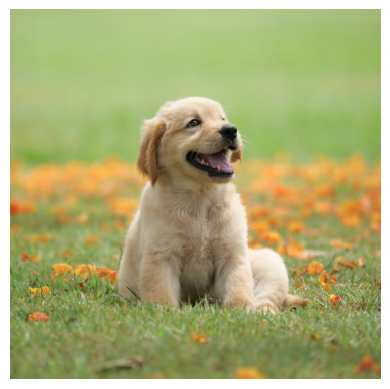

In [10]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('dog_real.png')

if image is None:
    print("Error: OpenCV could not read the image.")
else:
    # Convert BGR → RGB for correct display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


## 🧩 Image Shapes: `height × width × channels`

- Images are stored as **arrays** in the form:
  - Color image: `(Height, Width, 3)`
  - Grayscale image: `(Height, Width)`

- Examples:
  - RGB image of 640×480: `image.shape = (480, 640, 3)`
  - Grayscale 300×300: `image.shape = (300, 300)`

### 🔸 Key Points

- **Height**: Number of pixel rows (vertical size)
- **Width**: Number of pixel columns (horizontal size)
- **Channels**: 1 (grayscale), 3 (RGB/BGR), 4 (RGBA)


### 🔸 Code Example


In [11]:
image

array([[[123, 188, 166],
        [123, 188, 166],
        [123, 188, 166],
        ...,
        [117, 184, 163],
        [117, 184, 163],
        [117, 184, 163]],

       [[123, 188, 166],
        [123, 188, 166],
        [123, 188, 166],
        ...,
        [117, 184, 163],
        [117, 184, 163],
        [117, 184, 163]],

       [[123, 188, 166],
        [123, 188, 166],
        [123, 188, 166],
        ...,
        [117, 184, 163],
        [117, 184, 163],
        [117, 184, 163]],

       ...,

       [[ 54, 122,  99],
        [ 55, 123, 100],
        [ 55, 123, 100],
        ...,
        [ 72, 125, 122],
        [ 72, 125, 122],
        [ 73, 126, 123]],

       [[ 54, 122,  99],
        [ 54, 122,  99],
        [ 54, 122,  99],
        ...,
        [ 73, 126, 123],
        [ 73, 126, 123],
        [ 73, 126, 123]],

       [[ 52, 122,  99],
        [ 52, 122,  99],
        [ 54, 122,  99],
        ...,
        [ 73, 126, 122],
        [ 74, 127, 124],
        [ 74, 127, 124]]

In [12]:
print(image.shape)  # Output: (height, width, channels)

print("gives the BGR values of one single pixel:", image[0, 0])  # Pixel at top-left corner

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)  # Output: (height, width)


(1197, 1200, 3)
gives the BGR values of one single pixel: [123 188 166]
(1197, 1200)


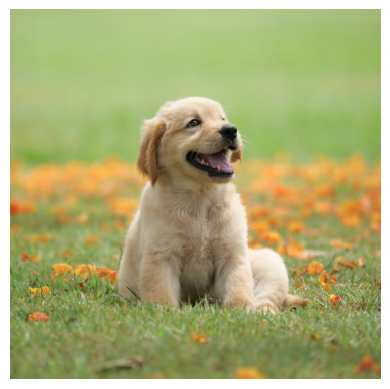

In [13]:
# display the image
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def display_image(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

display_image(img_rgb)

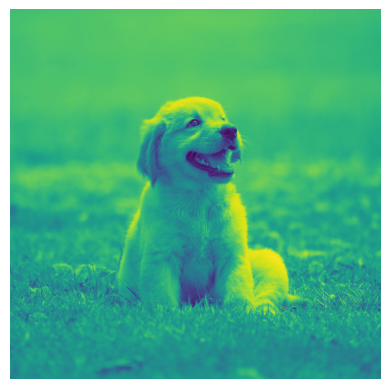

In [14]:
display_image(gray)

### Note:

When you convert an image to grayscale with OpenCV:

```python
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
```

You get a 2D array of intensity values (shape: [H, W]), where each pixel is a single number between 0 (black) and 255 (white).

However, when you display this grayscale image using matplotlib.pyplot.imshow() without specifying a colormap, matplotlib automatically applies a default color map — usually 'viridis', which results in the greenish/purplish color you see.

🎨 How to display it as true black-and-white:
Use the 'gray' colormap explicitly:

```python
import matplotlib.pyplot as plt

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
```



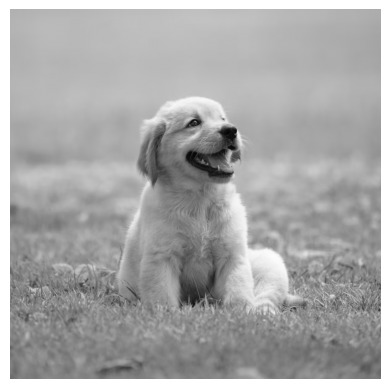

In [15]:
display_image(gray, True)

## 🌈 Color Spaces

Color spaces define how color is interpreted and manipulated in an image.

### 🔹 RGB vs BGR

- **RGB**: Common in most libraries (e.g., PIL, matplotlib)
- **BGR**: Default format in OpenCV  
  - Important: `cv2.imread()` returns BGR by default  
  - Displaying a BGR image using matplotlib (which expects RGB) may result in color distortion.

### example of pixel of numbers in color
[[[255, 0, 0], [0, 255, 0], [0, 0, 255]], ...]
This means: red pixel, green pixel, blue pixel.


### 🔹 Grayscale

- Converts RGB to a single channel using weighted brightness:  
  `Y = 0.299R + 0.587G + 0.114B`

### 🔹 HSV (Hue, Saturation, Value)

- A more perceptual color model:
  - **Hue**: Base color (0–179 in OpenCV)
  - **Saturation**: Color intensity (0–255)
  - **Value**: Brightness (0–255)
- Useful for color filtering and segmentation.


### 🔸 Code Example


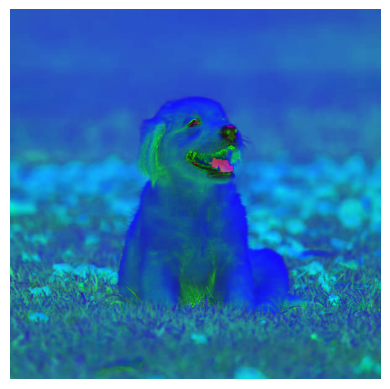

In [16]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
display_image(hsv_image)


### color wheel display

In [19]:
import cv2
import numpy as np

# Create an HSV image where Hue goes from 0–179 horizontally
hsv = np.zeros((100, 180, 3), dtype=np.uint8)
hsv[..., 0] = np.arange(180)   # Hue values (0–179)
hsv[..., 1] = 255              # Full saturation (vivid)
hsv[..., 2] = 255              # Full brightness

# Convert to BGR for display
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.imshow("HSV Color Wheel (Hue 0–179)", bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [44]:
import cv2
import numpy as np

# Step 1: Load the image
img = cv2.imread('dog_real.png')

# Optional: resize image itself (for easier viewing)
img = cv2.resize(img, (500, 350))

# Step 2: Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Step 3: Define range for green color in HSV
# Hue for green is roughly between 35 and 85
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Step 4: Create mask for green areas
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Step 5: Apply mask to the original image
green_detected = cv2.bitwise_and(img, img, mask=green_mask)

# Step 6: Create smaller windows and show results
cv2.namedWindow('Original Image', cv2.WINDOW_NORMAL)
cv2.namedWindow('Green Mask', cv2.WINDOW_NORMAL)
cv2.namedWindow('Detected Green Object', cv2.WINDOW_NORMAL)

cv2.resizeWindow('Original Image', 400, 300)
cv2.resizeWindow('Green Mask', 400, 300)
cv2.resizeWindow('Detected Green Object', 400, 300)

cv2.imshow('Original Image', img)
cv2.imshow('Green Mask', green_mask)
cv2.imshow('Detected Green Object', green_detected)

cv2.waitKey(0)
cv2.destroyAllWindows()


## detect red bacolor with hsv

### Detect red color from webcam feed

In [4]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = mask1 + mask2

    red_detected = cv2.bitwise_and(frame, frame, mask=red_mask)

    cv2.imshow('Original', frame)
    cv2.imshow('Red Detection', red_detected)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## 🖼️ Image Resolution and Bit Depth

### 🔹 Image Resolution

- **Resolution** = number of pixels in width × height
- Higher resolution = more image detail, larger file size
- Example: `1920 × 1080` = Full HD image

### 🔹 Bit Depth

- Defines how many bits represent each channel:
  - **8-bit**: values from 0–255 (standard)
  - **16-bit**: values from 0–65535 (used in scientific imaging)
  - **1-bit**: black & white only (0 or 1)

- For RGB:
  - 8 bits per channel → 24 bits/pixel → ~16.7 million colors


🔸 Inspecting Bit Depth

In [80]:
print(image.dtype)  # Typically: uint8 for 8-bit images

uint8



## 🧪 Basic Image Operations

These operations are useful for creating, editing, and manipulating image content using NumPy arrays and OpenCV functions.

---

### How to Create New Images?

You can create empty (black or white) or patterned images using NumPy:



In [23]:
import numpy as np

# Create a black image (all zeros)
black = np.zeros((200, 200, 3), dtype='uint8')

# Create a white image (all 255s)
white = np.ones((300, 300, 3), dtype='uint8') * 255

# Create a solid color image (e.g., red)
red = np.zeros((300, 300, 3), dtype='uint8')
red[:] = (0, 0, 255)  # BGR format

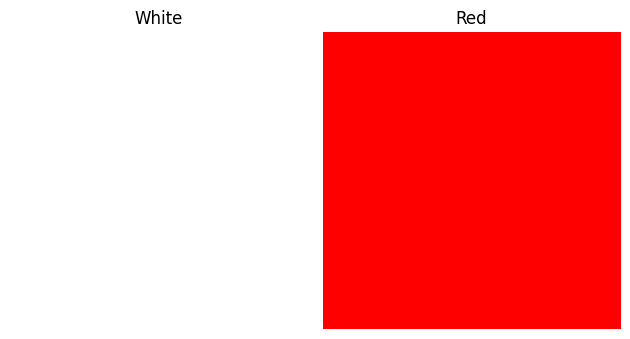

In [24]:
# Convert BGR to RGB for display
white_rgb = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
red_rgb = cv2.cvtColor(red, cv2.COLOR_BGR2RGB)

# Display both
plt.subplot(1, 2, 1)
plt.imshow(white_rgb)
plt.title("White")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(red_rgb)
plt.title("Red")
plt.axis('off')

plt.tight_layout()
plt.show()

### Cropping an image
Use NumPy slicing to crop a region of interest (ROI) or bounding box.



In [ ]:
import cv2

# Load and resize image
img = cv2.imread('dog_real.png')
img = cv2.resize(img, (600, 400))

# Create a function that runs when mouse is clicked
def show_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse click
        print(f"Clicked at X: {x}, Y: {y}")

# Create window
cv2.namedWindow("Image")

# Attach mouse callback
cv2.setMouseCallback("Image", show_coordinates)

# Show image
while True:
    cv2.imshow("Image", img)
    
    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
# X = 386, Y = 4
# X = 426, Y = 38


Clicked at X: 386, Y: 4
Clicked at X: 426, Y: 38


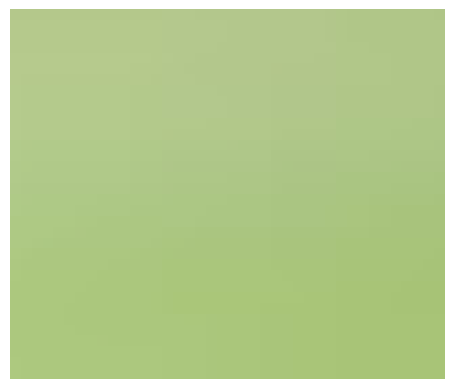

In [51]:
cropped = img[4:38, 386:426]  # [y1:y2, x1:x2]
display_image(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))


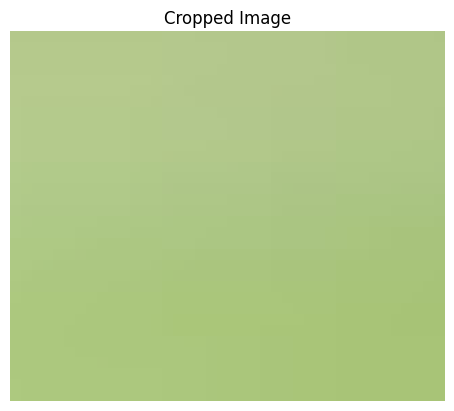

In [53]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()


### Copying a Region to Another in an Image

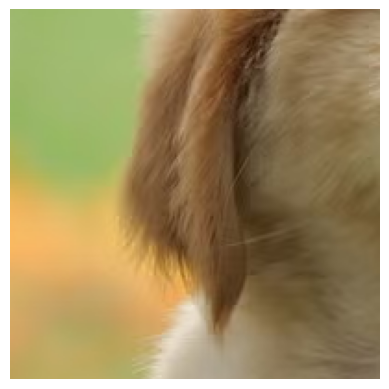

In [57]:
def display_image(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        # Convert from BGR to RGB before displaying
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    plt.axis('off')
    plt.show()
roi = image[400:600, 350:550]
display_image(roi)

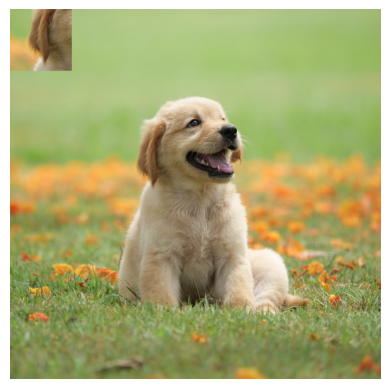

In [58]:
image[0:200, 0:200] = roi  # Paste ROI to top-left

display_image(image)

### Resizing an Image.
Use OpenCV's resize() function


In [59]:
resized = cv2.resize(image, (200, 200))  # Resize to 200x200
resized_half = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Half size

resized.shape

(200, 200, 3)

In [60]:
resized_half.shape

(598, 600, 3)

### Creating an Image Mask

Masks are single-channel binary images used to isolate regions.

In [37]:
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.rectangle(mask, (50, 50), (200, 200), 255, -1)

# Apply mask
masked_image = cv2.bitwise_and(image, image, mask=mask)


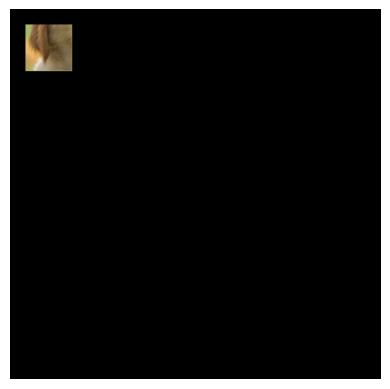

In [61]:
display_image(masked_image)

### 🔢 Mathematical Operations on Images

### 1. Datatype Conversion.

You often need to convert between uint8, float32, or uint16

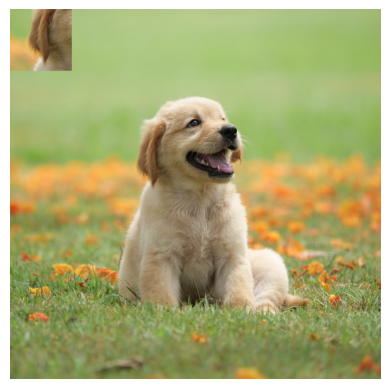

In [62]:
image_float = image.astype('float32') / 255.0  # Normalize to [0, 1]
image_uint8 = (image_float * 255).astype('uint16')

display_image(image_uint8)

### 2. Contrast Enhancement

Apply histogram equalization (for grayscale)

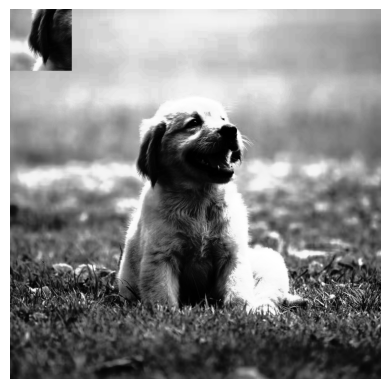

In [63]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

display_image(equalized)

### 3. Brightness Enhancement

You can adjust brightness by adding or subtracting pixel values:

In [64]:
brighter = cv2.add(image, 50)    # Increase brightness
darker = cv2.subtract(image, 50) # Decrease brightness


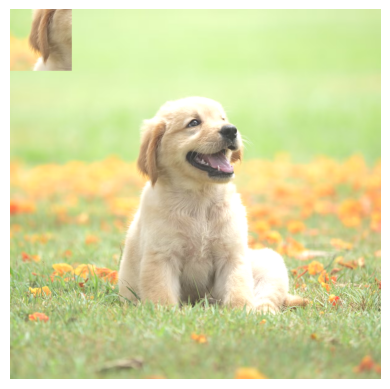

In [65]:
display_image(brighter)

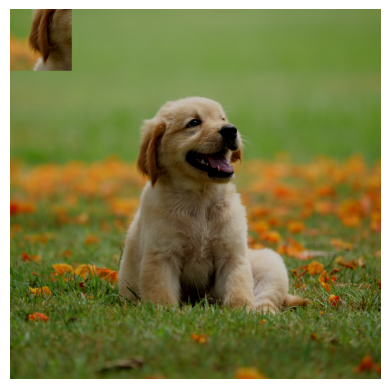

In [66]:
display_image(darker)

### Loading and Saving an Image

## 📂 Loading and Saving Images in OpenCV

OpenCV provides simple functions for reading from and writing to image files.

---

### ✅ 1. Loading an Image

Use `cv2.imread()` to load an image from disk:

```python
import cv2

# Load an image in color (default)
image = cv2.imread("cat.jpg")

# Load as grayscale
gray = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)
```


###  Saving an Image

Use cv2.imwrite() to write an image to file.  
Note that if an image is RGB format, Convert it back to BGR before saving:


In [68]:
bgr_darker = cv2.cvtColor(darker, cv2.COLOR_RGB2BGR)
cv2.imwrite("outputs.jpg", bgr_darker)


True